#Week 3: Regression
After getting over [week 2](http://www.galvanize.com/2015/05/01/data-science-101-making-sense-of-statistics-and-multi-armed-bandit/) we moved on to our regression phase. It was wild to see our first models working towards predicting outcomes based on features. We definitely picked up the pace of the program and understanding the pre-readings before lecture was very necessary. One of the books we keep going back to is [Intro to Stats Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf), I highly recommend it as a good starting point for anyone starting machine learning. 

Again, its fun learning a ton and applying the principles outside of the classroom. My mind wonders with what outcomes one could predict if they had all the features they needed. What features are necessary to quantify someones personality? What features do Uber's price surge use?

Here's some of the material we went over:
1. Linear Algebra
2. Hard core Numpy
3. Linear Regression
4. Ridge/Lasso Techniques
5. Logistic Regression
6. Gradient Descent
7. EDA Best Practices
8. Workflow

For the code of the week we are going to go over some Ridge, Lasso, and the nuts and bolts of linear regression. This one was completed by myself [Greg Kamradt](https://github.com/gkamradt) and [GScott Stukey](https://github.com/gscottstukey). 

Lets start off by importing our packages. A bunch of sklearn and our buddy numpy

In [227]:
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

Now load up your data. We are going to be using a sklearn data set.

In [228]:
boston = load_boston()
features = boston.data
target = boston.target # housing price

In [229]:
print "Sample Features:", features[1]
print "Sample Target:", target[1]
print "Number of features Features:", len(features[0])
print "How many items?", len(features)

Sample Features: [  2.73100000e-02   0.00000000e+00   7.07000000e+00   0.00000000e+00
   4.69000000e-01   6.42100000e+00   7.89000000e+01   4.96710000e+00
   2.00000000e+00   2.42000000e+02   1.78000000e+01   3.96900000e+02
   9.14000000e+00]
Sample Target: 21.6
Number of features Features: 13
How many items? 506


Looks like we're dealing with a data set that has 506 entries, 13 features comprised of floats. Looks pretty standard to me. Its times like these that pandas.describe()/head() would be useful.

Lets use sklearn to split up the data set into test and training subsets

In [230]:
train_feature, test_feature, train_target, test_target = \
train_test_split(features, target, test_size=0.3)

Next we are going to fit our data set through Linear Regression. With that model we will see how we do predicting with our training features and our test features. Lets plot out how we did. Ideally we would like to see all the points match up 1:1, or along a line with slope 0 and 0 intercept. 

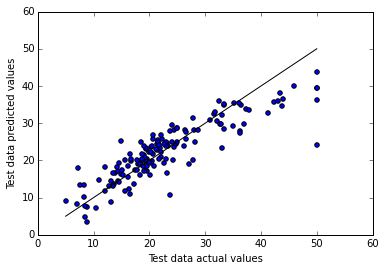

R^2: 0.768092527484


In [231]:
linear = LinearRegression()
linear.fit(train_feature, train_target)
train_predicted = linear.predict(train_feature)
test_predicted = linear.predict(test_feature)
plt.scatter(test_target, test_predicted)
plt.plot([5,50],[5,50], 'k-')
plt.xlabel('Test data actual values')
plt.ylabel('Test data predicted values')
plt.show()
print 'R^2:', linear.score(test_feature, test_target)

Looks like Linear Regression does not do that bad of a job. Lets try constricting our beta coefficients though Ridge and Lasso and see what kinda fits we get.

But first it is good to visualize what our coefficients look like as we fine tune our alpha. Alpha in this case will determine how much we restrict our betas. Higher Alpha = Lower Betas. See the for loop that goes through 50 values of alpha between 0 and 4.

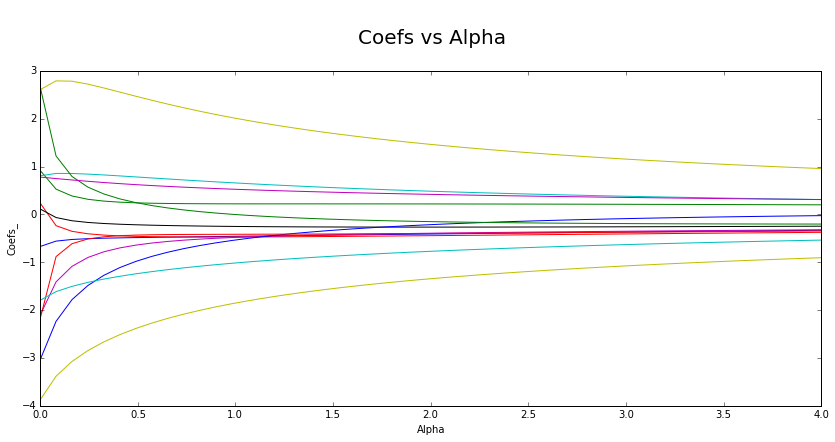

In [232]:
#RIDGE

k = train_feature.shape[1]
alphas = np.linspace(start = 0, stop = 4, num = 50)
params = np.zeros(shape = (len(alphas), k))

#  Go through each alpha and append a list with our updated list of Beta Coefs. 
for i,a in enumerate(alphas):
    #  scale the features
    X_data = preprocessing.scale(train_feature)
    fit = Ridge(alpha=a, normalize=True).fit(X_data, train_target)
    params[i] = fit.coef_
    
plt.figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)
    plt.xlabel('Alpha')
    plt.ylabel('Coefs_')
    plt.title('\nCoefs vs Alpha\n', size=20)

In the plot above we see the coefficients approach 0 as our alphas get bigger. Makes sense, alpha grows, betas shrink. However, beta's don't really mean anything to us on their own. In order to judge their value, we have to plot the Mean Squared Error (MSE) and see if changing the alpha helps us out at all.

In [233]:
#RIDGE with Cross Val
train_mse = []
test_mse = []

k = X.shape[1]
alphas = np.linspace(start = 0, stop = 4, num = 100)
#alphas = np.linspace(0, 1) #smaller lin space
params = np.zeros((len(alphas), k))


for i,a in enumerate(alphas):
    fit = Ridge(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_
    cv=5  # Number of buckets that we'll use in our cross fold below
    
    # keep track of our training and test data. 
    train_mse.append(sklearn.cross_validation.cross_val_score(estimator=fit, X=train_feature, y=train_target, cv=cv, scoring='mean_squared_error').mean()*-1)    
    test_mse.append(sklearn.cross_validation.cross_val_score(estimator=fit, X=test_feature, y=test_target, cv=cv, scoring='mean_squared_error').mean()*-1)

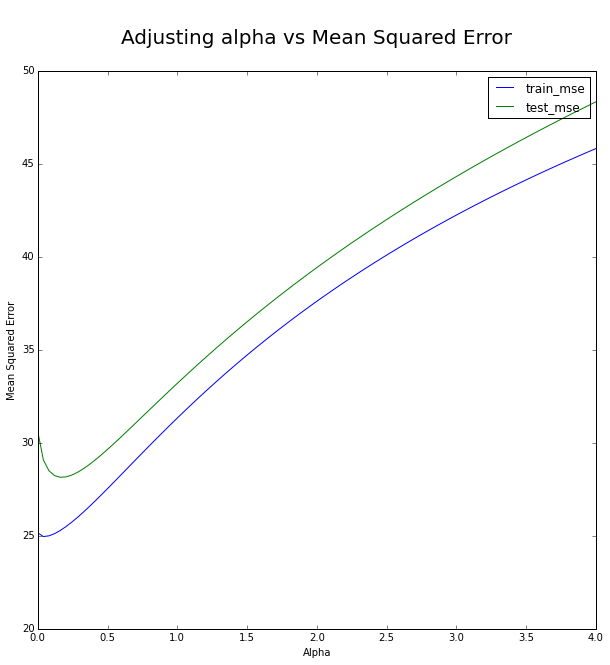

In [234]:
plt.figure(1, figsize=(10,10))
plt.plot(alphas, train_mse, label="train_mse")
plt.plot(alphas, test_mse, label="test_mse")

#plt.xlim(0,.2)
#plt.ylim(22,30)
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('\nAdjusting alpha vs Mean Squared Error\n', size=20)
plt.show()

In [235]:
print alphas[np.argmin(test_mse)]

0.161616161616


Looks like adjusting our alphas actually does give us a better result than alpha = 0. Above we can see the MSE take a dip and bottoms out at .1616. We want the MSE to be as low as possible. Not bad.

Now its time to try Lasso. Unlike ridge, Lasso is a version of Linear Regression that has the ability to 0 out certain beta coefs. This is good when you have a ton of features that don't add to your total prediction. Lets see what the betas look like as we adjust alpha here.

c:\python\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


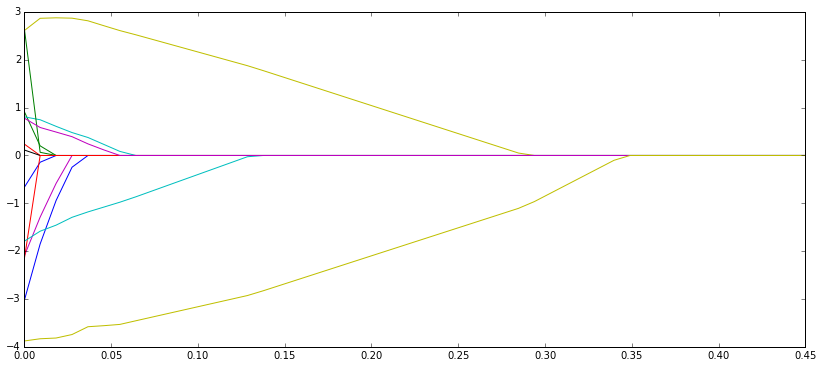

In [236]:
#LASSO

k = X.shape[1]
#alphas = np.linspace(0, 4)
alphas = np.linspace(0, .45)

params = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    X_data = preprocessing.scale(train_feature)
    fit = Lasso(alpha=a, normalize=True).fit(X_data, train_target)
    params[i] = fit.coef_
    
plt.figure(figsize=(14,6))
for param in params.T:
    plt.plot(alphas, param)

With Lasso we can see that the coefs get shrunk down to 0 very quickly. It is interesting to notice which coefs get scaled down to 0 first vs the others. Again, coefs are one thing, but lets check out the MSE before we make any declarations.

In [237]:
#LASSO with Cross Val

train_mse = []
test_mse = []

k = X.shape[1]
alphas = np.linspace(0, 1, 150) #smaller lin space

params = np.zeros((len(alphas), k))

for i,a in enumerate(alphas):
    fit = Lasso(alpha=a, normalize=True).fit(X_data, y)
    params[i] = fit.coef_
    
    cv=5
    
    train_mse.append(sklearn.cross_validation.cross_val_score(estimator=fit, X=train_feature, y=train_target, cv=cv, scoring='mean_squared_error').mean()*-1)    
    test_mse.append(sklearn.cross_validation.cross_val_score(estimator=fit, X=test_feature, y=test_target, cv=cv, scoring='mean_squared_error').mean()*-1)

c:\python\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


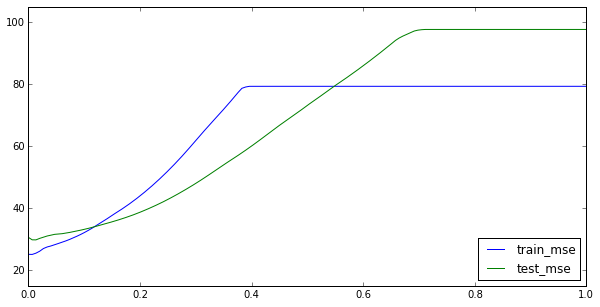

In [244]:
plt.figure(1, figsize=(10,5))
plt.plot(alphas, train_mse, label="train_mse")
plt.plot(alphas, test_mse, label="test_mse")

#plt.xlim(0,.2)
plt.ylim(15,105)
plt.legend(loc='lower right')
plt.show()

In [245]:
print alphas[np.argmin(test_mse)]

0.0134228187919


Looks like in this case with our alphas wants to take on the value of .0134, actually worked out the best. It is interesting to compare all three models, linear regression regular, ridge and lasso.

After this step its easy to call it a day and say you're done. However I'm interested in actually seeing the math do some work here. We have our feature array and we have our best fit coefs. Lets do a dot product between the two, get our predicted answers, and compare those to their true values.

First, fit and predict our model with our training data. We will use these predictions to compare with our predictions that we get from the coefs

In [246]:
fit = Lasso(alpha=0, normalize=True).fit(train_feature, train_target)
lasso_fit = fit.coef_  # getting out coefs from the lasso output above
lasso_fit = np.append(lasso_fit, fit.intercept_)  # Add our intercept on the end of the list of coefs

c:\python\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':


Next we are going to add a column of ones to our test_feature, this will account for our intercept, B0.

After that we will do a dot product between our coefs and our test data. We could have the model do this for us automatically, but its a lot cooler seeing it happen this way.

R^2: 0.768092527484


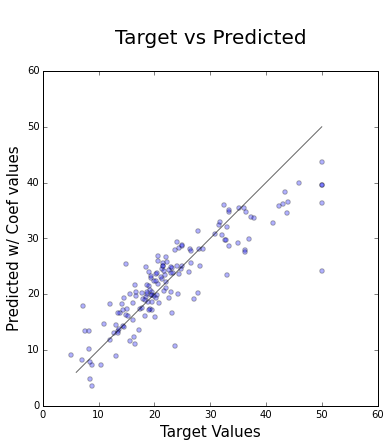

In [241]:
test_feature_intercept_added = np.append(test_feature, np.ones(len(test_feature)).reshape(len(test_feature), 1), 1)

predict = np.dot(lasso_fit, test_feature_intercept_added.T)
    
plt.figure(1, figsize=(6,6))
plt.scatter(test_target, predict, alpha=.3)
plt.plot([6, 50], [6, 50], c='k', alpha=.6)
plt.xlabel('Target Values', size=15)
plt.ylabel('Predicted w/ Coef values', size=15)
plt.title('\nTarget vs Predicted\n', size=20)
print "R^2:", fit.score(test_feature, test_target)

##The Finale
This is sweet because the black line is a line segment with slope 1 (where we would like to see all of our points, a perfect prediction). As you can see most of the points line up with what we would expect. Our dot product coefs matched up with what the true values were. Its fun to see, we had 13 features, ~150 data points, and this is the graph that sums up our process.